## データの読み込み

In [102]:
import numpy
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X = boston.data  # 特徴量
y = boston.target  # 目的変数
feature_names = boston.feature_names  # 特徴量名

df = DataFrame(data=X, columns=feature_names)
df['MEDV'] = y  # 目的変数

X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train0 = X_train[:, 0].reshape(-1, 1)  # 訓練データのRM
X_train1 = X_train[:, 1].reshape(-1, 1)  # 訓練データのLSTAT
X_test0 = X_test[:, 0].reshape(-1, 1)  # テストデータのRM
X_test1 = X_test[:, 1].reshape(-1, 1)  # テストデータのLSTAT

## RM

In [103]:
# scikit-learn ライブラリから RandomForestRegressor を import
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor のインスタンスを生成。 criterion='mse' は、不純度に平均二乗誤差を利用するというパラメータ
rf0 = RandomForestRegressor(criterion='mse', random_state=42)

In [104]:
# fit()
rf0.fit(X_train0, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [105]:
# score() メソッドを利用して、決定係数を計算。
print(rf0.score(X_train0, y_train))
print(rf0.score(X_test0, y_test))
# 完全に過学習している

0.8500949744417928
0.3682723129466367


### プロット

In [106]:
from matplotlib import pyplot
import japanize_matplotlib

# predict() メソッドを利用して、テストデータの予測値を計算
y_pred = rf0.predict(X_test0)
# テストデータの RM を昇順にソートしたときのインデックスを計算
idx = numpy.argsort(X_test0[:, 0])

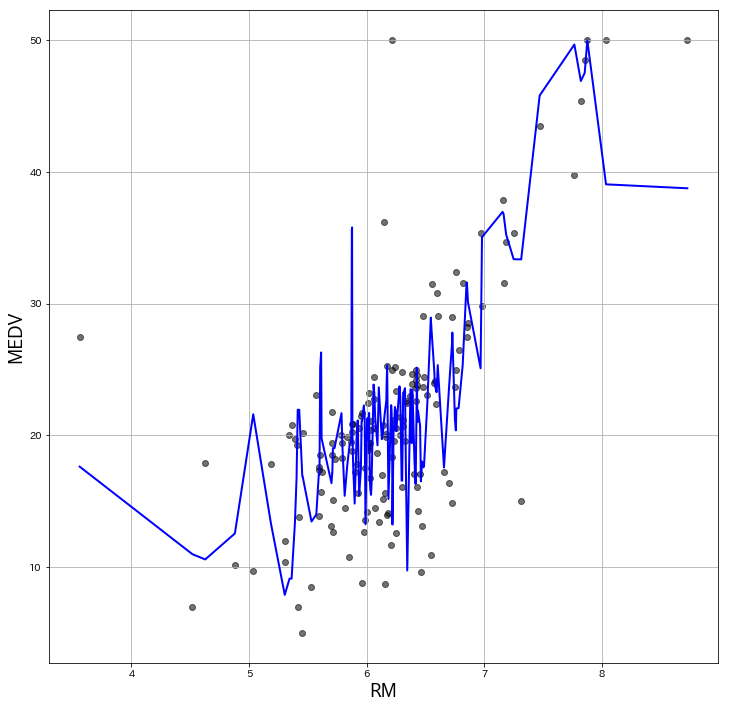

In [107]:
fig = pyplot.figure(figsize=(12, 12))

# テストデータのプロット
pyplot.scatter(X_test0, y_test, color='black', alpha=0.55)

# 予測値のプロット
# データのRMの昇順にプロット
pyplot.plot(X_test0[:, 0][idx], y_pred[idx], linewidth=2, color='blue')

pyplot.xlabel('RM', fontsize=18)
pyplot.ylabel('MEDV', fontsize=18)

pyplot.grid()
pyplot.show()

## LSTAT

In [108]:
rf1 = RandomForestRegressor(criterion='mse', random_state=42, n_estimators=30, max_depth=2)

# fit() メソッドを利用して、モデルを学習します。
rf1.fit(X_train1, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [109]:
# score() メソッドを利用して、決定係数を計算します。
print(rf1.score(X_train1, y_train))
print(rf1.score(X_test1, y_test))

0.714389224839738
0.6099056211896079


In [110]:
y_pred = rf1.predict(X_test1)

# テストデータの LSTAT を昇順にソートしたときのインデックスを計算。
idx = numpy.argsort(X_test1[:, 0])

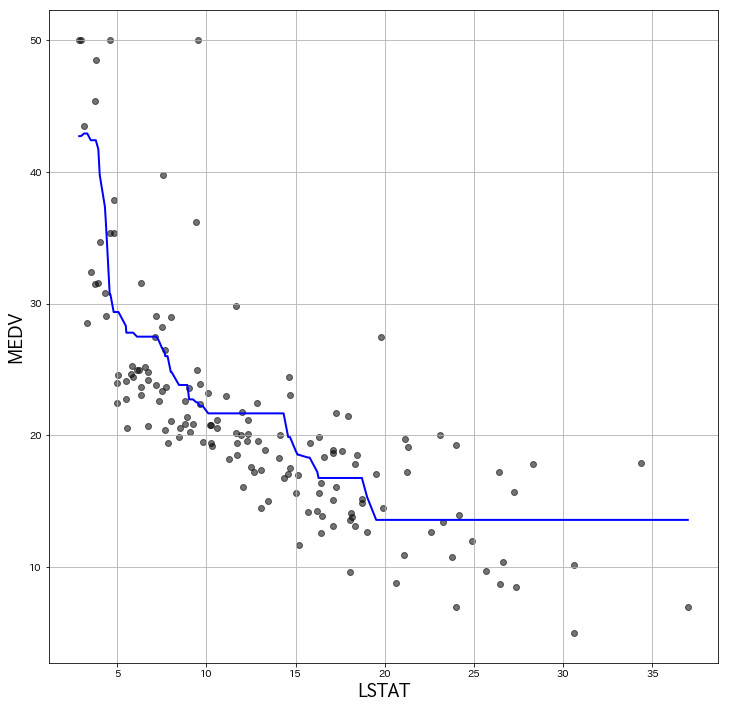

In [111]:
fig = pyplot.figure(figsize=(12, 12))

# テストデータのプロット（散布図）
pyplot.scatter(X_test1, y_test, color='black', alpha=0.55)

# 予測値のプロット（直線）
# データを LSTAT の昇順にプロット。
pyplot.plot(X_test1[:, 0][idx], y_pred[idx], linewidth=2, color='blue')

pyplot.xlabel("LSTAT", fontsize=18)
pyplot.ylabel("MEDV", fontsize=18)

pyplot.grid()
pyplot.show()

## RM　＆ LSTAT

In [112]:
rf = RandomForestRegressor(criterion='mse', random_state=42)

rf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [113]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9453894964814328
0.6975550710517615
